In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

* First i will read data ,and renamed it.

* this data have decumentation you can search about it

In [75]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data"

# Assign the correct column names based on the dataset documentation
columns = ['ID', 'Diagnosis'] + [
    'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean',
    'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean',
    'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se',
    'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se',
    'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst',
    'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst',
    'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst'
]

# Load the dataset and assign these column names
data = pd.read_csv(url, header=None, names=columns)
data.drop(columns=['ID'], inplace=True)


In [76]:
data.head()

,Diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [77]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

* Here i encoded data to label encoding ,because the data is Ordinal data ,and to make the model have awareness to get value 1 more wighte .

In [78]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data["Diagnosis"] = le.fit_transform(data["Diagnosis"])

In [79]:
data["Diagnosis"].value_counts()

Diagnosis
0    357
1    212
Name: count, dtype: int64

* Above, we can see that the data is not balanced. this issue i will solve it after split data

In [80]:
data.corr()["Diagnosis"].sort_values(ascending=False)[:8]

Diagnosis               1.000000
concave points_worst    0.793566
perimeter_worst         0.782914
concave points_mean     0.776614
radius_worst            0.776454
perimeter_mean          0.742636
area_worst              0.733825
radius_mean             0.730029
Name: Diagnosis, dtype: float64

In [81]:
feateures = data[['concave points_worst', 'perimeter_worst']]
target = data['Diagnosis']

Text(0.5, 1.0, 'Scatter plot of concave points_worst vs perimeter_worst')

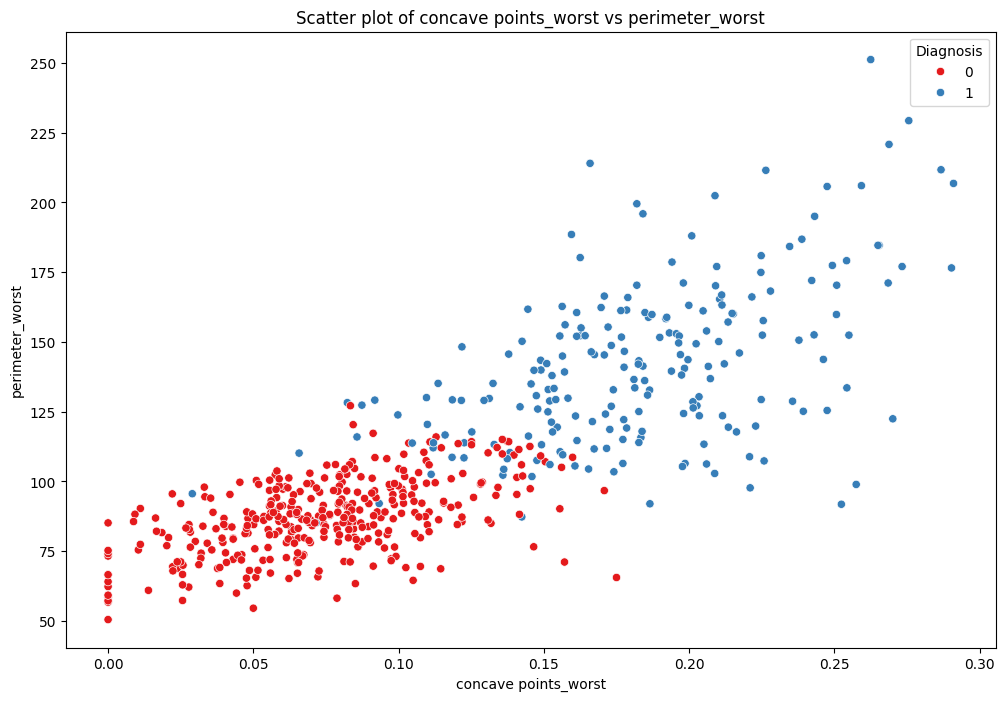

In [82]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='concave points_worst', y='perimeter_worst', hue='Diagnosis', data=data, palette='Set1')
plt.title('Scatter plot of concave points_worst vs perimeter_worst')

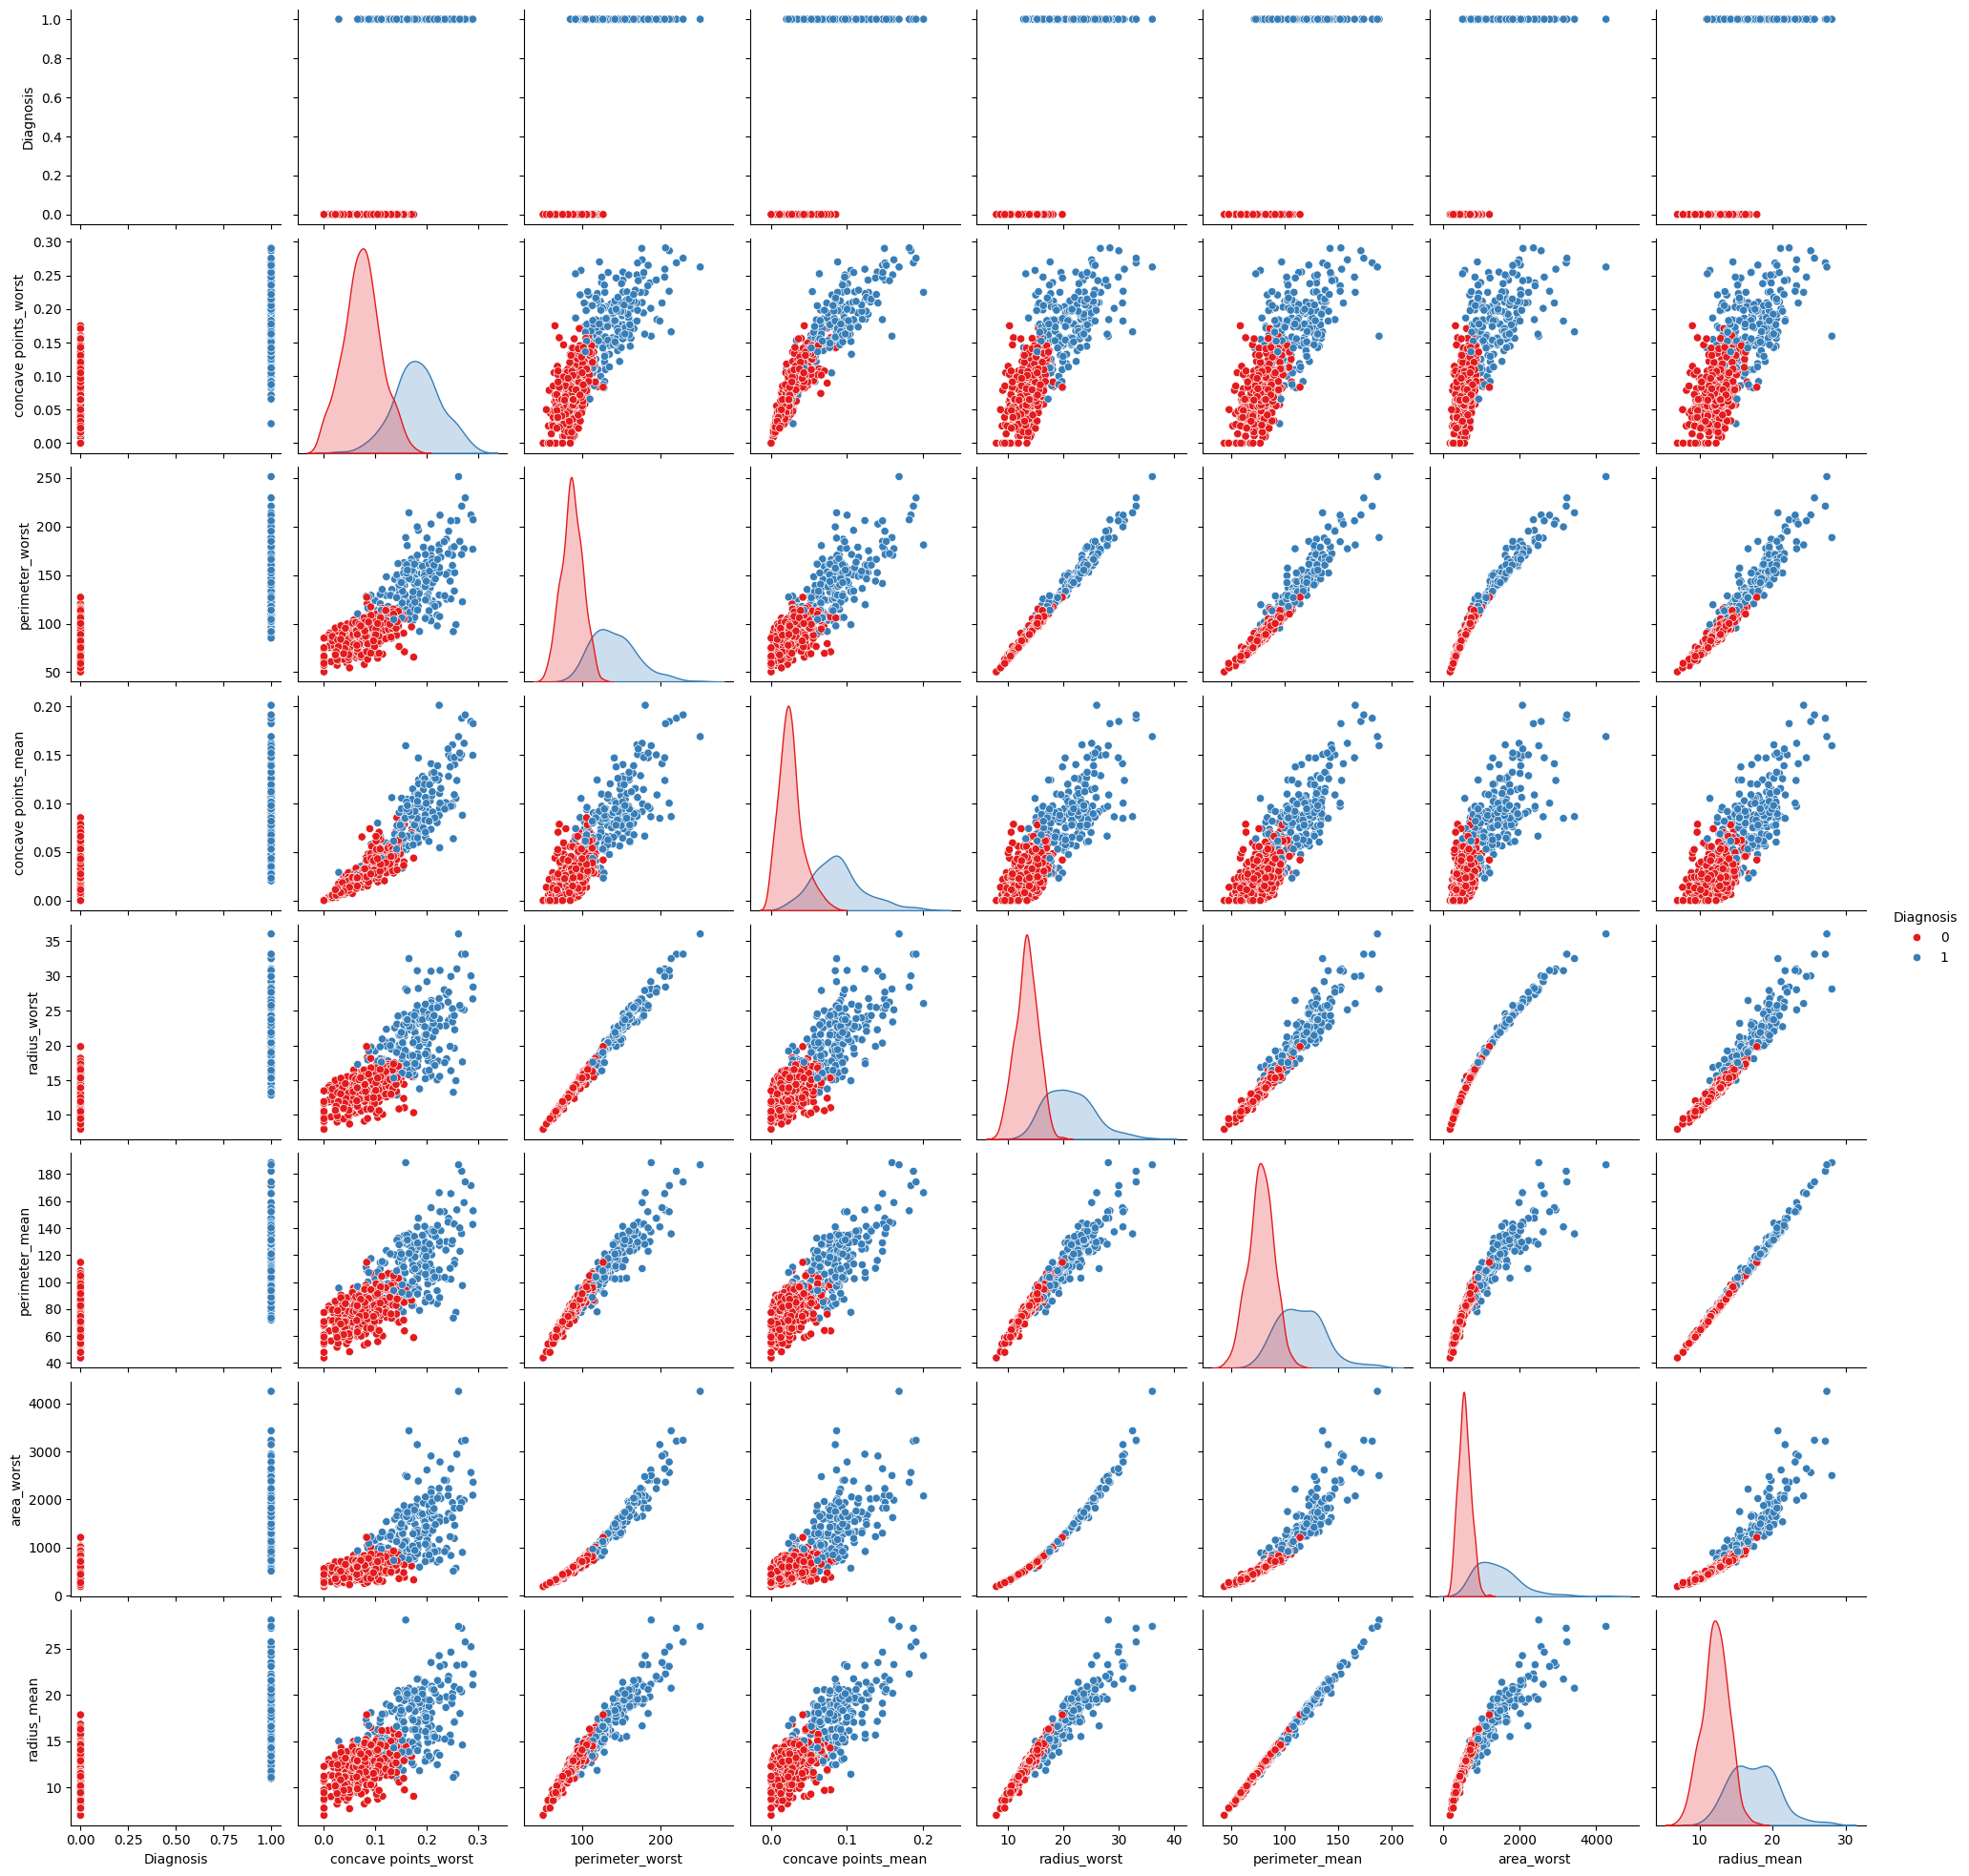

In [83]:
plt.Figure(figsize=(15,10))
sns.pairplot(data=data, hue='Diagnosis', vars=data.corr()["Diagnosis"].sort_values(ascending=False)[:8].index, palette='Set1')

Text(0.5, 1.0, 'Scatter plot of concave points_worst vs radius_worst')

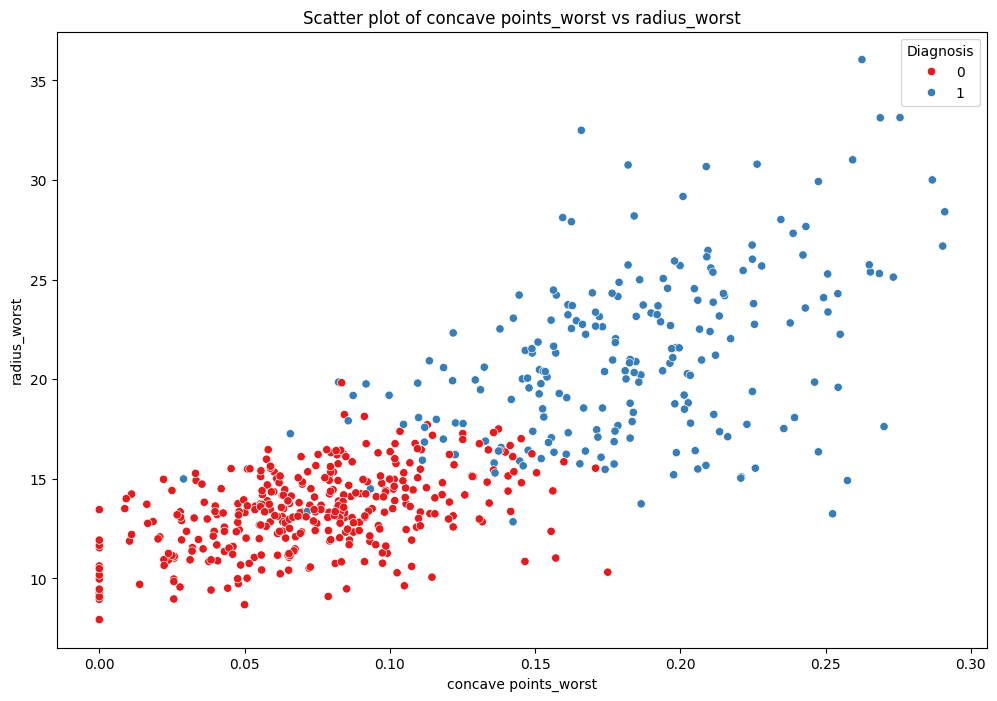

In [84]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='concave points_worst', y='radius_worst', hue='Diagnosis', data=data, palette='Set1')
plt.title('Scatter plot of concave points_worst vs radius_worst')

#### i try to get the most top feature is realated with target columns and in same time have less error
this epuation is founded in this two feature from my point of view ,['concave points_worst', 'perimeter_worst'] 😊 

In [85]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(feateures, target, test_size=0.2, random_state=42)

In [86]:
from imblearn.over_sampling import SMOTE
smote=SMOTE(random_state=42)

In [87]:
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

In [88]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((455, 2), (114, 2), (455,), (114,))

In [89]:
X_train_balanced.shape, X_test.shape, y_train_balanced.shape, y_test.shape

((572, 2), (114, 2), (572,), (114,))

* #### preprocessing step is very samplie because data is already clean.
* I will going to train model , I will try Logistic model first to see model accuracy

In [90]:
from sklearn.linear_model import LogisticRegression
lg=LogisticRegression(max_iter=1000)
lg.fit(X_train_balanced,y_train_balanced)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [91]:
lg_pred=lg.predict(X_test)
lg_pred_prob=lg.predict_proba(X_test)

In [92]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, lg_pred))
print(classification_report(y_test, lg_pred))

[[69  2]
 [ 1 42]]
              precision    recall  f1-score   support

           0       0.99      0.97      0.98        71
           1       0.95      0.98      0.97        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



* i will going to SVM model ,this model is more strong algorithms and have difference kernel ,and we will see that.

In [93]:
from sklearn.svm import SVC
svm_model = SVC(probability=True)
svm_model.fit(X_train_balanced, y_train_balanced)

,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,True
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


* confusion_matrix function used to output TP,TN,FP,FN , and classification_report represent more data about confusion_matrix

In [94]:
svm_pred = svm_model.predict(X_test)
svm_pred_prob = svm_model.predict_proba(X_test)
print(confusion_matrix(y_test, svm_pred))
print(classification_report(y_test, svm_pred))

[[69  2]
 [ 4 39]]
              precision    recall  f1-score   support

           0       0.95      0.97      0.96        71
           1       0.95      0.91      0.93        43

    accuracy                           0.95       114
   macro avg       0.95      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



there we will recognise the logistic model give me output well more than SVM because we don`t need to take risk or class false ,this is the main fouces for me

In [ ]:
X=data.drop(columns=['Diagnosis'],axis=1)
Y=data['Diagnosis']

In [96]:
data.describe()

,Diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [130]:
Y.value_counts()

Diagnosis
0    357
1    212
Name: count, dtype: int64

In [97]:
print(X.shape, Y.shape)

(569, 30) (569,)


* This step is more advanced because i split data into validation and test

In [98]:

X_train, X_temp, y_train, y_temp = train_test_split(
    X, Y, train_size=400,shuffle=True, random_state=42, stratify=Y
)


X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=69, shuffle=True, random_state=42, stratify=y_temp
)


In [99]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = pd.DataFrame(
    scaler.fit_transform(X_train),
    columns=X_train.columns,
    index=X_train.index
)

X_val_scaled = pd.DataFrame(
    scaler.transform(X_val),
    columns=X_val.columns,
    index=X_val.index
)

X_test_scaled = pd.DataFrame(
    scaler.transform(X_test),
    columns=X_test.columns,
    index=X_test.index
)


In [100]:
X_train

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
339,23.510,24.27,155.10,1747.0,0.10690,0.12830,0.23080,0.14100,0.1797,0.05506,1.0090,0.9245,6.462,164.10,0.006292,0.019710,0.035820,0.013010,0.01479,0.003118,30.67,30.73,202.40,2906.0,0.15150,0.26780,0.48190,0.20890,0.2593,0.07738
140,9.738,11.97,61.24,288.5,0.09250,0.04102,0.00000,0.00000,0.1903,0.06422,0.1988,0.4960,1.218,12.26,0.006040,0.005656,0.000000,0.000000,0.02277,0.003220,10.62,14.10,66.53,342.9,0.12340,0.07204,0.00000,0.00000,0.3105,0.08151
352,25.730,17.46,174.20,2010.0,0.11490,0.23630,0.33680,0.19130,0.1956,0.06121,0.9948,0.8509,7.222,153.10,0.006369,0.042430,0.042660,0.015080,0.02335,0.003385,33.13,23.58,229.30,3234.0,0.15300,0.59370,0.64510,0.27560,0.3690,0.08815
355,12.560,19.07,81.92,485.8,0.08760,0.10380,0.10300,0.04391,0.1533,0.06184,0.3602,1.4780,3.212,27.49,0.009853,0.042350,0.062710,0.019660,0.02639,0.004205,13.37,22.43,89.02,547.4,0.10960,0.20020,0.23880,0.09265,0.2121,0.07188
90,14.620,24.02,94.57,662.7,0.08974,0.08606,0.03102,0.02957,0.1685,0.05866,0.3721,1.1110,2.279,33.76,0.004868,0.018180,0.011210,0.008606,0.02085,0.002893,16.11,29.11,102.90,803.7,0.11150,0.17660,0.09189,0.06946,0.2522,0.07246
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37,13.030,18.42,82.61,523.8,0.08983,0.03766,0.02562,0.02923,0.1467,0.05863,0.1839,2.3420,1.170,14.16,0.004352,0.004899,0.013430,0.011640,0.02671,0.001777,13.30,22.81,84.46,545.9,0.09701,0.04619,0.04833,0.05013,0.1987,0.06169
415,11.890,21.17,76.39,433.8,0.09773,0.08120,0.02555,0.02179,0.2019,0.06290,0.2747,1.2030,1.930,19.53,0.009895,0.030530,0.016300,0.009276,0.02258,0.002272,13.05,27.21,85.09,522.9,0.14260,0.21870,0.11640,0.08263,0.3075,0.07351
458,13.000,25.13,82.61,520.2,0.08369,0.05073,0.01206,0.01762,0.1667,0.05449,0.2621,1.2320,1.657,21.19,0.006054,0.008974,0.005681,0.006336,0.01215,0.001514,14.34,31.88,91.06,628.5,0.12180,0.10930,0.04462,0.05921,0.2306,0.06291
476,14.200,20.53,92.41,618.4,0.08931,0.11080,0.05063,0.03058,0.1506,0.06009,0.3478,1.0180,2.749,31.01,0.004107,0.032880,0.028210,0.013500,0.01610,0.002744,16.45,27.26,112.10,828.5,0.11530,0.34290,0.25120,0.13390,0.2534,0.07858


* Here i will select just two feature to make it more easy to recognize that

In [101]:
selected_features = ['perimeter_worst', 'concave points_mean']
X_selected = X_train[selected_features]


In [102]:
X_selected

,perimeter_worst,concave points_mean
339,202.40,0.14100
140,66.53,0.00000
352,229.30,0.19130
355,89.02,0.04391
90,102.90,0.02957
...,...,...
37,84.46,0.02923
415,85.09,0.02179
458,91.06,0.01762
476,112.10,0.03058


<Axes: xlabel='perimeter_worst', ylabel='concave points_mean'>

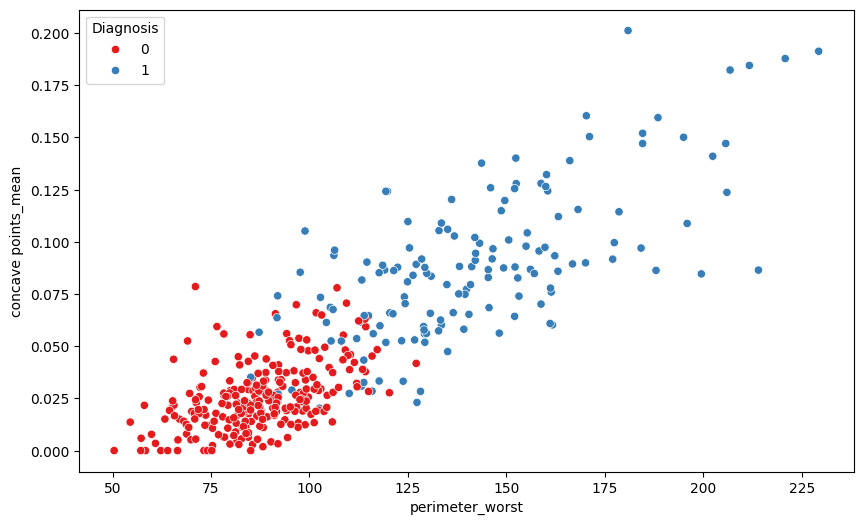

In [103]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='perimeter_worst', y='concave points_mean', hue=data['Diagnosis'], data=X_selected.join(data['Diagnosis']), palette='Set1')

A linear kernel is the simplest form of kernel used in SVM. It is suitable when the data is linearly separable meaning that a straight line (or hyperplane in higher dimensions) can effectively separate the classes.
It is used for text classification problems such as spam detection

In [104]:
from sklearn.svm import SVC

model = SVC(kernel='linear', C=1, gamma='scale', random_state=42)
model.fit(X_train_scaled, y_train)


,C,1
,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [105]:

y_pred_train = model.predict(X_train_scaled)
train_acc = accuracy_score(y_train, y_pred_train)


In [106]:
y_pred_val = model.predict(X_val_scaled)
val_acc = accuracy_score(y_val, y_pred_val)

In [107]:
y_pred_test = model.predict(X_test_scaled)
test_acc = accuracy_score(y_test, y_pred_test)

In [131]:
print(f"🔹 دقة التدريب: {train_acc * 100:.2f}%")
print(f"🔹 دقة التحقق (Validation): {val_acc * 100:.2f}%")
print(f"🔹 دقة الاختبار (Test): {test_acc * 100:.2f}%")

print(classification_report(y_test, y_pred_test))

print(confusion_matrix(y_test, y_pred_test))

🔹 دقة التدريب: 94.00%
🔹 دقة التحقق (Validation): 96.00%
🔹 دقة الاختبار (Test): 92.75%
              precision    recall  f1-score   support

           0       0.91      0.98      0.94        43
           1       0.96      0.85      0.90        26

    accuracy                           0.93        69
   macro avg       0.93      0.91      0.92        69
weighted avg       0.93      0.93      0.93        69

[[42  1]
 [ 4 22]]


* i will represent what does SVM model with linear kernel do on this data

c:\Users\mohma\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


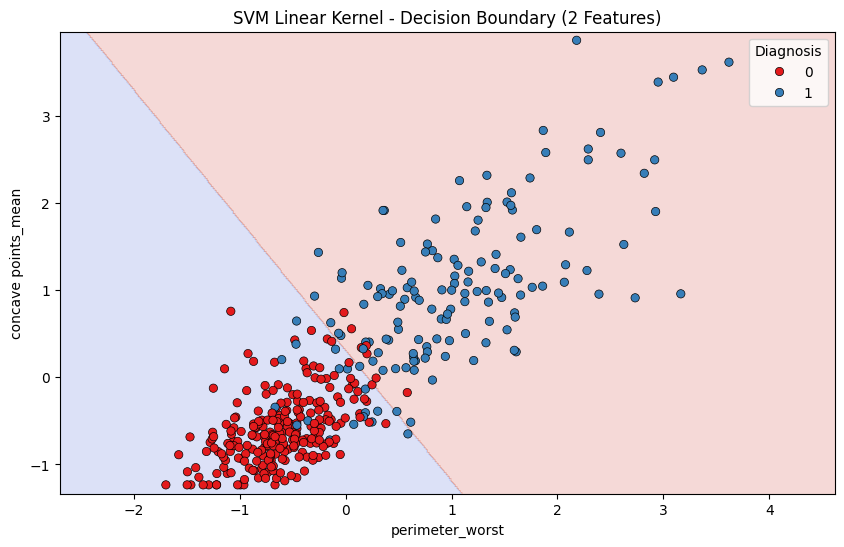

In [109]:

selected_features = ['perimeter_worst', 'concave points_mean']

X_train_selected = X_train_scaled[selected_features]
X_val_selected = X_val_scaled[selected_features]
X_test_selected = X_test_scaled[selected_features]


from sklearn.svm import SVC
model_2d = SVC(kernel='linear', C=1, gamma='scale', random_state=42)
model_2d.fit(X_train_selected, y_train)



x_min, x_max = X_train_selected[selected_features[0]].min() - 1, X_train_selected[selected_features[0]].max() + 1
y_min, y_max = X_train_selected[selected_features[1]].min() - 0.1, X_train_selected[selected_features[1]].max() + 0.1

xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                     np.linspace(y_min, y_max, 500))

Z = model_2d.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)


plt.figure(figsize=(10,6))
plt.contourf(xx, yy, Z, alpha=0.2, cmap='coolwarm')
sns.scatterplot(
    x=selected_features[0], y=selected_features[1],
    hue=y_train, data=X_train_selected.join(y_train),
    palette='Set1', edgecolor='k'
)
plt.title("SVM Linear Kernel - Decision Boundary (2 Features)")
plt.xlabel(selected_features[0])
plt.ylabel(selected_features[1])
plt.show()


here data is not completely separated because kernel is linear type ,so that is not a perfect type for this data . we can use the same model but different type of kernel will be good like (rbf)

In [110]:
X_train_selected

,perimeter_worst,concave points_mean
339,2.819404,2.339059
140,-1.216920,-1.235583
352,3.618529,3.614268
355,-0.548804,-0.122374
90,-0.136468,-0.485922
...,...,...
37,-0.684269,-0.494542
415,-0.665554,-0.683161
458,-0.488202,-0.788880
476,0.136839,-0.460317


-> The RBF kernel is the most widely used kernel in SVM. It maps the data into an infinite-dimensional space making it highly effective for complex classification problems. The formula of RBF kernel is.
We use RBF kernel When the decision boundary is highly non-linear and we have no prior knowledge about the data’s structure is available

In [111]:
RBF_KERNEL_MODEL = SVC(kernel='rbf', C=1, gamma='scale', random_state=42)
RBF_KERNEL_MODEL.fit(X_train_selected, y_train)
pre_rbf=RBF_KERNEL_MODEL.predict(X_test_selected)
print(confusion_matrix(y_test, pre_rbf))

[[42  1]
 [ 4 22]]


i in regerall case like this ,first step after trian model by feeding it data ,
i look before eny thing for confusion_matrix and i detect that ,
the kernal rbf and linear give me the same confusion_matrix that meaning the model have over fiting with overdose😂😂
so i will breform some step to handel that issue


but first i will confirm it

In [112]:

y_pred_train = RBF_KERNEL_MODEL.predict(X_train_selected)
train_acc = accuracy_score(y_train, y_pred_train)

y_pred_val = RBF_KERNEL_MODEL.predict(X_val_selected)

y_pred_test = RBF_KERNEL_MODEL.predict(X_test_selected)
test_acc = accuracy_score(y_test, y_pred_test)


In [113]:
print(f"🔹 دقة التدريب: {train_acc * 100:.2f}%")
print(f"🔹 دقة التحقق (Validation): {val_acc * 100:.2f}%")
print(f"🔹 دقة الاختبار (Test): {test_acc * 100:.2f}%")

print("\n📊 تقرير التصنيف (Classification Report):")
print(classification_report(y_test, y_pred_test))

print("\n🧩 مصفوفة الارتباك (Confusion Matrix):")
print(confusion_matrix(y_test, y_pred_test))

🔹 دقة التدريب: 94.00%
🔹 دقة التحقق (Validation): 96.00%
🔹 دقة الاختبار (Test): 92.75%

📊 تقرير التصنيف (Classification Report):
              precision    recall  f1-score   support

           0       0.91      0.98      0.94        43
           1       0.96      0.85      0.90        26

    accuracy                           0.93        69
   macro avg       0.93      0.91      0.92        69
weighted avg       0.93      0.93      0.93        69


🧩 مصفوفة الارتباك (Confusion Matrix):
[[42  1]
 [ 4 22]]


الحمد لله here there is no overfitting , i learned from that Confusion Matrix is not a good way to describe model well, so i will continue

c:\Users\mohma\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


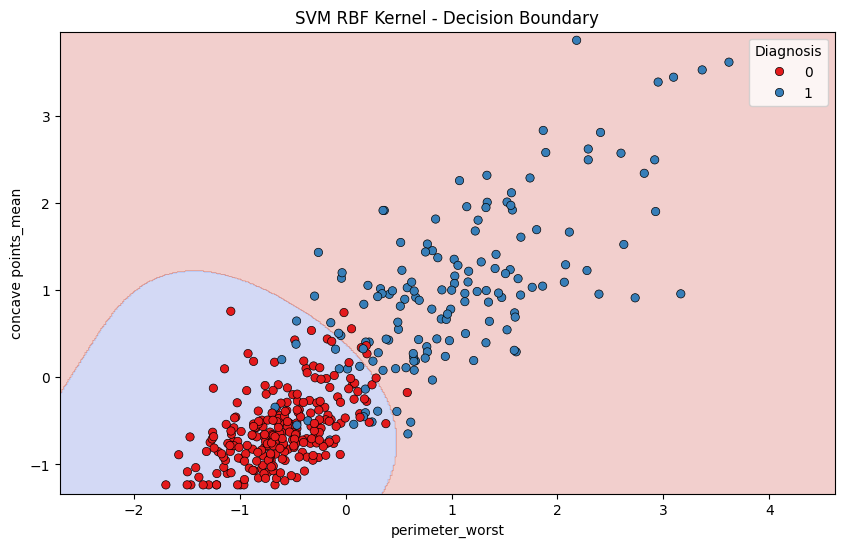

In [114]:
x_min, x_max = X_train_selected[selected_features[0]].min() - 1, X_train_selected[selected_features[0]].max() + 1
y_min, y_max = X_train_selected[selected_features[1]].min() - 0.1, X_train_selected[selected_features[1]].max() + 0.1

xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                     np.linspace(y_min, y_max, 500))

Z = RBF_KERNEL_MODEL.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10,6))
plt.contourf(xx, yy, Z, alpha=0.25, cmap='coolwarm')
sns.scatterplot(
    x=selected_features[0],
    y=selected_features[1],
    hue=y_train,
    data=X_train_selected.join(y_train),
    palette='Set1',
    edgecolor='k'
)
plt.title("SVM RBF Kernel - Decision Boundary")
plt.xlabel(selected_features[0])
plt.ylabel(selected_features[1])
plt.show()

after some steps of updata Confusion Matrix give me new output and we see a different out put and different plot


In [115]:

y_val_pred_linear = model_2d.predict(X_val_selected)
y_test_pred_linear = model_2d.predict(X_test_selected)

y_val_pred_rbf = RBF_KERNEL_MODEL.predict(X_val_selected)
y_test_pred_rbf = RBF_KERNEL_MODEL.predict(X_test_selected)

val_acc_linear = accuracy_score(y_val, y_val_pred_linear)
test_acc_linear = accuracy_score(y_test, y_test_pred_linear)

val_acc_rbf = accuracy_score(y_val, y_val_pred_rbf)
test_acc_rbf = accuracy_score(y_test, y_test_pred_rbf)


print("🔹 Linear Kernel:")
print(f"Validation Accuracy: {val_acc_linear:.4f}")
print(f"Testing Accuracy:    {test_acc_linear:.4f}\n")

print("🔹 RBF Kernel:")
print(f"Validation Accuracy: {val_acc_rbf:.4f}")
print(f"Testing Accuracy:    {test_acc_rbf:.4f}")


🔹 Linear Kernel:
Validation Accuracy: 0.9200
Testing Accuracy:    0.9420

🔹 RBF Kernel:
Validation Accuracy: 0.9300
Testing Accuracy:    0.9275


Grid search is a hyperparameter tuning technique in machine learning that systematically explores a predefined set of hyperparameter values to find the combination that yields the best model performance

In [116]:
from sklearn.model_selection import GridSearchCV

In [117]:
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'gamma': [0.001, 0.01, 0.1, 1]
}
grid_search = GridSearchCV(
    estimator=RBF_KERNEL_MODEL,
    param_grid=param_grid,
    scoring='accuracy',
    cv=5,
    n_jobs=-1
)
grid_search.fit(X_train_scaled, y_train)

,estimator,"SVC(C=1, random_state=42)"
,param_grid,"{'C': [0.01, 0.1, ...], 'gamma': [0.001, 0.01, ...]}"
,scoring,'accuracy'
,n_jobs,-1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,C,10


In [118]:
grid_search.best_params_

{'C': 10, 'gamma': 0.01}

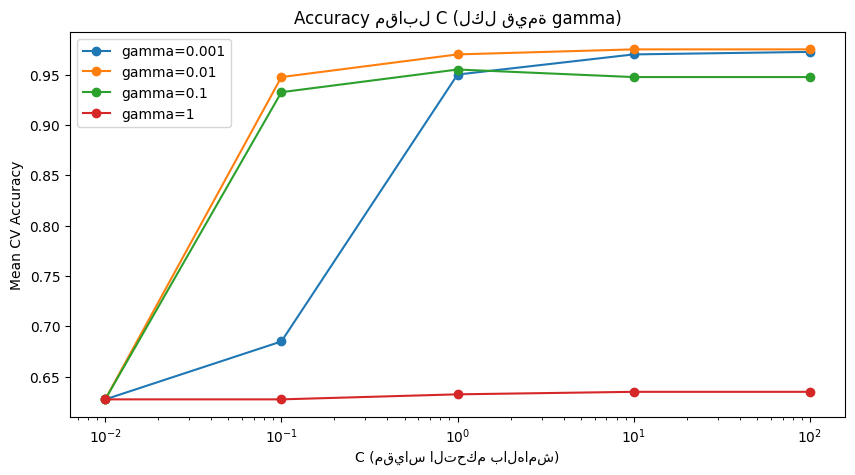

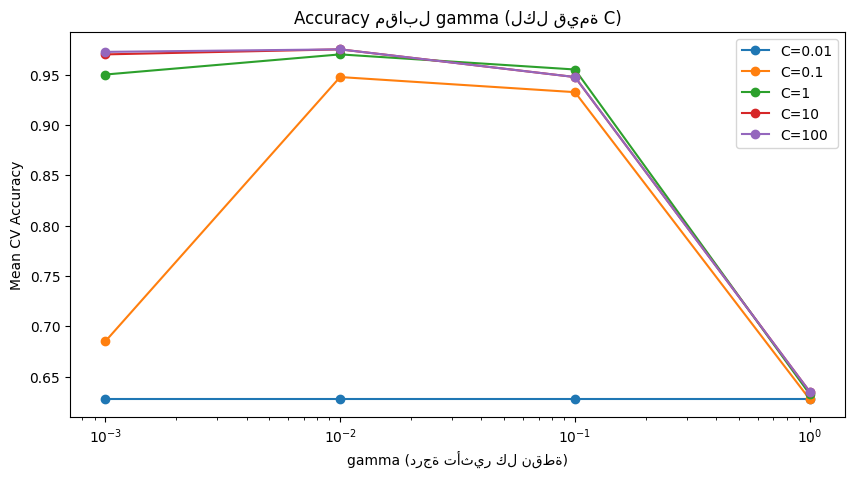

In [119]:
import pandas as pd

results = pd.DataFrame(grid_search.cv_results_)

plt.figure(figsize=(10,5))
for gamma in param_grid['gamma']:
    subset = results[results['param_gamma'] == gamma]
    plt.plot(subset['param_C'], subset['mean_test_score'], marker='o', label=f'gamma={gamma}')
plt.xscale('log')
plt.title("Accuracy مقابل C (لكل قيمة gamma)")
plt.xlabel("C (مقياس التحكم بالهامش)")
plt.ylabel("Mean CV Accuracy")
plt.legend()
plt.show()

plt.figure(figsize=(10,5))
for C in param_grid['C']:
    subset = results[results['param_C'] == C]
    plt.plot(subset['param_gamma'], subset['mean_test_score'], marker='o', label=f'C={C}')
plt.xscale('log')
plt.title("Accuracy مقابل gamma (لكل قيمة C)")
plt.xlabel("gamma (درجة تأثير كل نقطة)")
plt.ylabel("Mean CV Accuracy")
plt.legend()
plt.show()


In [120]:
import time
def measure_time(X_train, y_train, X_test, y_test, kernel, C=1, gamma='scale'):
    start_train = time.time()
    model = SVC(kernel=kernel, C=C, gamma=gamma, random_state=42)
    model.fit(X_train, y_train)
    end_train = time.time()

    start_pred = time.time()
    model.predict(X_test)
    end_pred = time.time()

    train_time = end_train - start_train
    pred_time = end_pred - start_pred
    return train_time, pred_time


In [121]:
n_10 = int(len(X_train_scaled) * 0.1)
X_train_10 = X_train_scaled[:n_10]
y_train_10 = y_train[:n_10]

results = []

t_train, t_pred = measure_time(X_train_10, y_train_10, X_test_scaled, y_test, kernel='linear', C=1)
results.append(['10% linear', t_train, t_pred])

t_train, t_pred = measure_time(X_train_scaled, y_train, X_test_scaled, y_test, kernel='linear', C=1)
results.append(['100% linear', t_train, t_pred])

t_train, t_pred = measure_time(X_train_10, y_train_10, X_test_scaled, y_test, kernel='rbf', C=1, gamma=0.01)
results.append(['10% rbf', t_train, t_pred])

t_train, t_pred = measure_time(X_train_scaled, y_train, X_test_scaled, y_test, kernel='rbf', C=1, gamma=0.01)
results.append(['100% rbf', t_train, t_pred])

df_times = pd.DataFrame(results, columns=['Case', 'Training Time (s)', 'Prediction Time (s)'])
print(df_times)


          Case  Training Time (s)  Prediction Time (s)
0   10% linear           0.002043             0.001324
1  100% linear           0.003012             0.000751
2      10% rbf           0.001416             0.000727
3     100% rbf           0.002639             0.000987


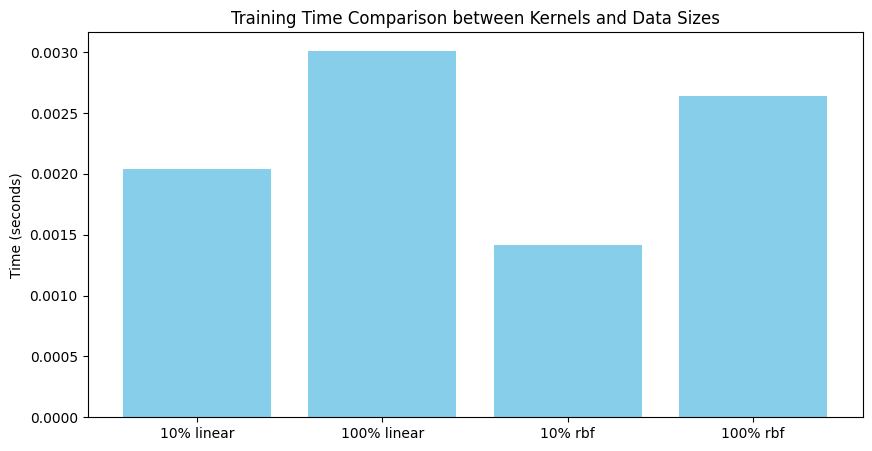

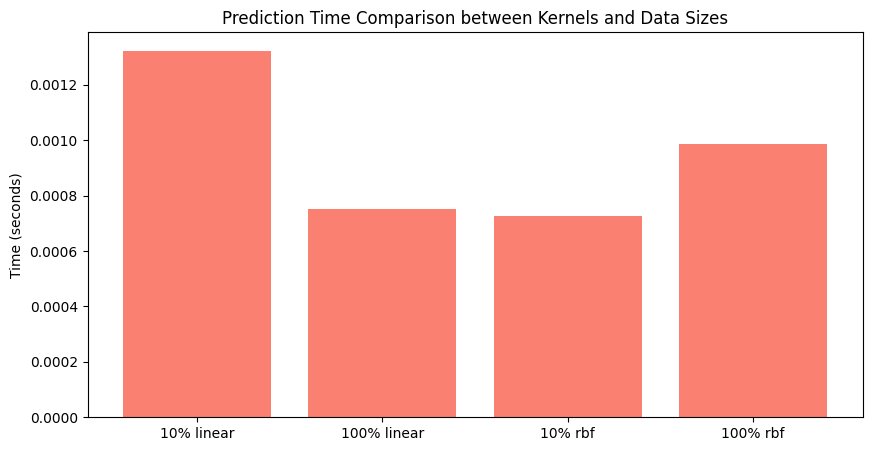

In [122]:
plt.figure(figsize=(10,5))
plt.bar(df_times['Case'], df_times['Training Time (s)'], color='skyblue')
plt.title('Training Time Comparison between Kernels and Data Sizes')
plt.ylabel('Time (seconds)')
plt.show()

plt.figure(figsize=(10,5))
plt.bar(df_times['Case'], df_times['Prediction Time (s)'], color='salmon')
plt.title('Prediction Time Comparison between Kernels and Data Sizes')
plt.ylabel('Time (seconds)')
plt.show()


in this step we will different two features and see the changes

In [123]:
data.corr()['Diagnosis'].sort_values( ascending=False)

Diagnosis                  1.000000
concave points_worst       0.793566
perimeter_worst            0.782914
concave points_mean        0.776614
radius_worst               0.776454
perimeter_mean             0.742636
area_worst                 0.733825
radius_mean                0.730029
area_mean                  0.708984
concavity_mean             0.696360
concavity_worst            0.659610
compactness_mean           0.596534
compactness_worst          0.590998
radius_se                  0.567134
perimeter_se               0.556141
area_se                    0.548236
texture_worst              0.456903
smoothness_worst           0.421465
symmetry_worst             0.416294
texture_mean               0.415185
concave points_se          0.408042
smoothness_mean            0.358560
symmetry_mean              0.330499
fractal_dimension_worst    0.323872
compactness_se             0.292999
concavity_se               0.253730
fractal_dimension_se       0.077972
symmetry_se               -0

here i will choice a different two feateurs ,okay?!😊 ["radius_worst","perimeter_mean"]

<Axes: xlabel='radius_worst', ylabel='perimeter_mean'>

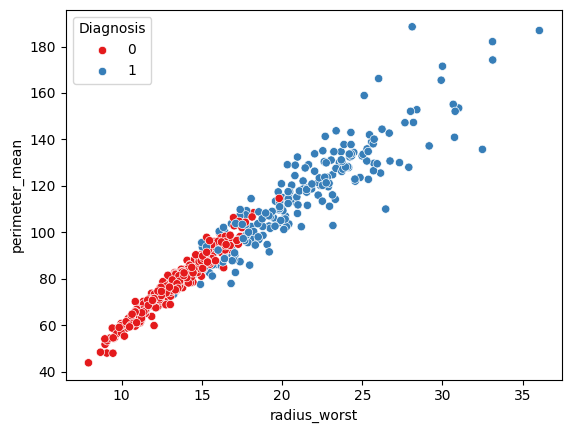

In [124]:
sns.scatterplot(x='radius_worst', y='perimeter_mean', hue='Diagnosis', data=data, palette='Set1')

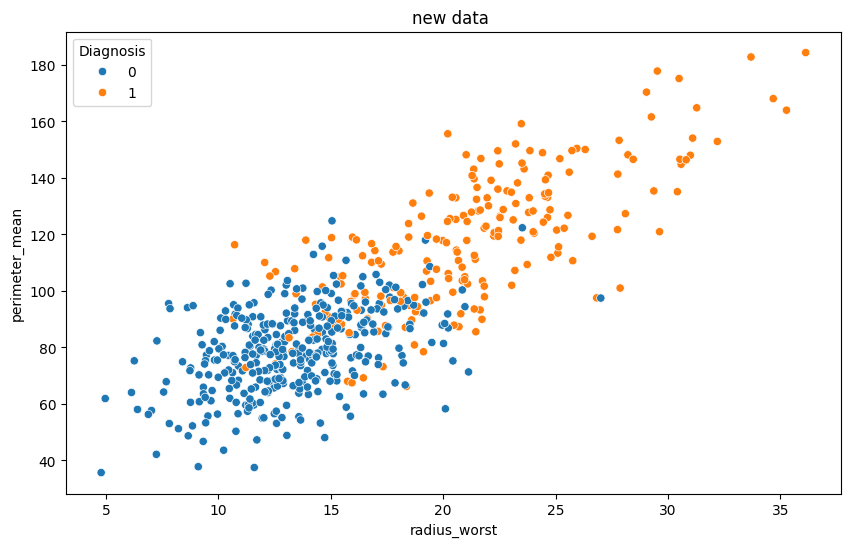

In [125]:
data_noisy = data.copy()


np.random.seed(42) 
data_noisy['radius_worst'] = data_noisy['radius_worst'] + np.random.normal(0, 2.5, len(data_noisy))
data_noisy['perimeter_mean'] = data_noisy['perimeter_mean'] + np.random.normal(0, 10, len(data_noisy))

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.scatterplot(
    x='radius_worst',
    y='perimeter_mean',
    hue='Diagnosis',
    data=data_noisy,
)
plt.title("new data ")
plt.show()

In [126]:
new_linear_model = SVC(kernel='linear', C=1, gamma='scale', random_state=42)
new_linear_model.fit(data_noisy[['radius_worst', 'perimeter_mean']], data_noisy['Diagnosis'])

,C,1
,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [127]:
new_rbf_model = SVC(kernel='rbf', C=1, gamma='scale', random_state=42)
new_rbf_model.fit(data_noisy[['radius_worst', 'perimeter_mean']], data_noisy['Diagnosis'])

,C,1
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [128]:
from sklearn.metrics import accuracy_score

acc_linear = accuracy_score(data_noisy['Diagnosis'], new_linear_model.predict(data_noisy[['radius_worst', 'perimeter_mean']]))
acc_rbf = accuracy_score(data_noisy['Diagnosis'], new_rbf_model.predict(data_noisy[['radius_worst', 'perimeter_mean']]))

print(f"🔹 Linear Kernel Accuracy with nosy data: {acc_linear:.4f}")
print(f"🔹 RBF Kernel Accuracy with nosy data:    {acc_rbf:.4f}")

y_val_pred_linear = model_2d.predict(X_val_selected)
y_test_pred_linear = model_2d.predict(X_test_selected)

y_val_pred_rbf = RBF_KERNEL_MODEL.predict(X_val_selected)
y_test_pred_rbf = RBF_KERNEL_MODEL.predict(X_test_selected)

val_acc_linear = accuracy_score(y_val, y_val_pred_linear)
test_acc_linear = accuracy_score(y_test, y_test_pred_linear)

val_acc_rbf = accuracy_score(y_val, y_val_pred_rbf)
test_acc_rbf = accuracy_score(y_test, y_test_pred_rbf)
print(f"🔹 Linear Kernel Testing Accuracy with accurate data:    {test_acc_linear:.4f}")

print(f"🔹 RBF Kernel: Testing Accuracy with accurate data:    {test_acc_rbf:.4f}")

🔹 Linear Kernel Accuracy with nosy data: 0.8699
🔹 RBF Kernel Accuracy with nosy data:    0.8629
🔹 Linear Kernel Testing Accuracy with accurate data:    0.9420
🔹 RBF Kernel: Testing Accuracy with accurate data:    0.9275


there is a big diferent detween two data ,and this is logic ,and we can see the diff between linear kernal and rbf kernal is very small with nosy data ,that is mean we need anthor strong model to handel with this nosy data

#### Point number 6:

in this part i will discuss SVM with pros and cons and when to use it

* pros:

    * SVM supports many kernels (linear, rbf, poly) to handle both linear and non-linear data.
    * SVM (linear): works like linear regression but finds the best line that separates the classes.
    * SVM (rbf): maps data into higher dimensions to separate non-linear points easily.
    * SVM (poly): creates curved decision boundaries using polynomial equations.
    * Works well with small, clean, and high-dimensional datasets.

* cons:

Slow on large datasets and needs tuning for C, gamma, etc.
Sensitive to noise and hard to interpret.

* when to use:

When data is small or non-linear and accuracy is important.

* when not to use:
When data is large, noisy, or needs fast, simple models.

